In [1]:
import os
import pyfits
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
files=[item for item in os.listdir('data/B2.5/') if item.startswith('ALI')]

In [3]:
Ali_Sci_Images=[]
adinfo=[]
for i in files:
    n=pyfits.open('data/B2.5/'+i)
    Ali_Sci_Images+=[n[0].data]
    adinfo+=[np.loadtxt('info/'+i[:-5]+'.inf')] # info: 'Center_x_new','Center_y_new','Orientation'

In [4]:
n.close()

In [5]:
era=np.median(Ali_Sci_Images, axis=0)

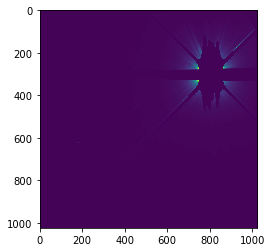

In [6]:
plt.imshow(era)

In [7]:
subs=[i-era for i in Ali_Sci_Images] 

In [8]:
maxw=1500

In [9]:
dst=np.zeros((maxw,maxw))
for ainf,sub in zip(adinfo,subs):
    canvas=np.zeros((maxw,maxw))
    canvas[maxw-len(sub):maxw,:len(sub)]=sub
    # info: 'Center_x_new','Center_y_new','Orientation'
    cx=int(round(ainf[0]))
    cy=int(round(ainf[1])+maxw-len(sub))
    M = cv2.getRotationMatrix2D((cx,cy),-ainf[2],1)
    dst += cv2.warpAffine(canvas,M,canvas.shape)/len(subs)


In [10]:
sdst=np.zeros((maxw,maxw))
for ainf,sub in zip(adinfo,subs):
    canvas=np.zeros((maxw,maxw))
    canvas[maxw-len(sub):maxw,:len(sub)]=sub
    # info: 'Center_x_new','Center_y_new','Orientation'
    cx=int(round(ainf[0]))
    cy=int(round(ainf[1])+maxw-len(sub))
    M = cv2.getRotationMatrix2D((cx,cy),-ainf[2],1)
    sdst += (cv2.warpAffine(canvas,M,canvas.shape)-dst)**2/len(subs)

sdst=np.sqrt(sdst)

In [11]:
dst2=np.zeros((maxw,maxw))
for ainf,sub in zip(adinfo,subs):
    canvas=np.zeros((maxw,maxw))
    canvas[maxw-len(sub):maxw,:len(sub)]=sub
    # info: 'Center_x_new','Center_y_new','Orientation'
    cx=int(round(ainf[0]))
    cy=int(round(ainf[1])+maxw-len(sub))
    M = cv2.getRotationMatrix2D((cx,cy),-ainf[2],1)
    R = cv2.warpAffine(canvas,M,canvas.shape)
    dst2 += R*(dst-sdst<R)*(R<(dst+sdst))

In [12]:
(dst==dst2).all()

False

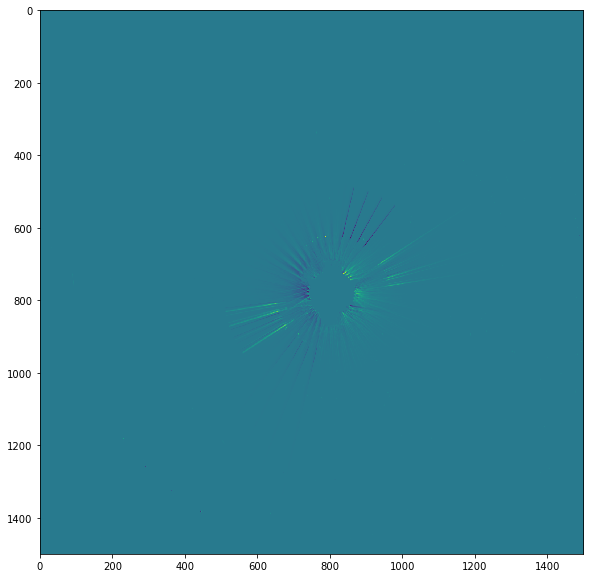

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(dst)

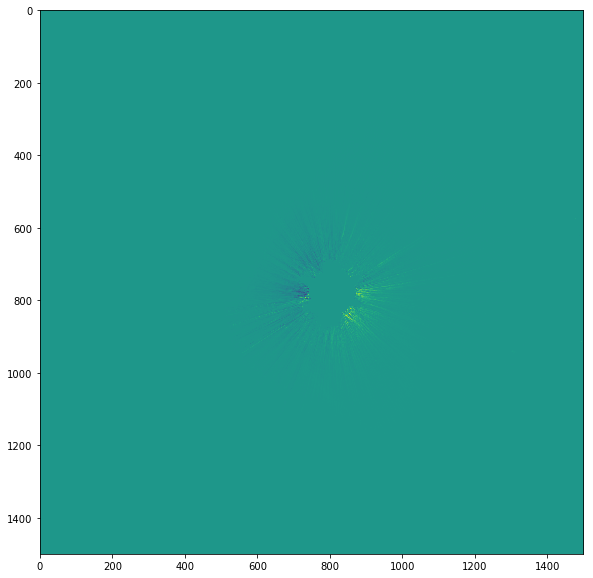

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(dst2)

(400, 1300)

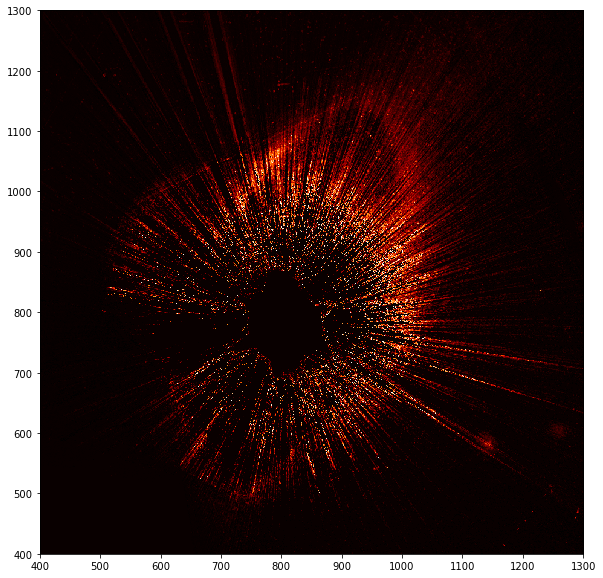

In [47]:
plt.figure(figsize=(10,10))
plt.imshow(dst2*(dst2<250)*(dst2>-6),cmap='gist_heat')
plt.xlim(400,1300)
plt.ylim(400,1300)

In [143]:
pyfits.writeto('rot_Ali_Sci.fits', dst)

In [144]:
pyfits.writeto('rot_Ali_Sci_C_s.fits', dst*(dst<(dst.mean()+dst.std())))

In [145]:
pyfits.writeto('rot_Ali_Sci_C_sP.fits', dst2)